### a) Construcción de Dataframe

In [1]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')
print df.head()

print list(df.columns.values)
registros,atributos = df.shape
print "Cantidad de registros",registros
print "Cantidad de atributos",atributos

            
    


     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  
['tweet_id', 'sentiment', 'author', 'content']
Cantidad de registros 40000
Cantidad de atributos 4


Este dataset consta de 40000 tweets, cada tweet tiene una id asociada,  una emoción mutuamente excluyente con las demás, el autor y el texto.

In [2]:
def clase_ocurrencia(df,campo):
    clases = {}
    for index,row in df.iterrows():
        if row[campo] not in clases.keys():
                clases[row[campo]] = 1
        else:
            clases[row[campo]] += 1
    return clases

emotions = clase_ocurrencia(df,'sentiment')
print "Clases y la cantidad de registros por clases"
print emotions




Clases y la cantidad de registros por clases
{'love': 3842, 'relief': 1526, 'neutral': 8638, 'anger': 110, 'sadness': 5165, 'empty': 827, 'surprise': 2187, 'fun': 1776, 'enthusiasm': 759, 'happiness': 5209, 'hate': 1323, 'worry': 8459, 'boredom': 179}


### b) Construcción de conjuntos

In [3]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
print msk
df_train = df[msk]
df_test = df[~msk]
print(len(df_train))
print(len(df_test))

[ True  True  True ...,  True  True  True]
32013
7987


### c) Pre procesamiento 

Para aumentar la eficacia de las caracterı́sticas extraı́das es conveniente ejecutar algunas técnicas de pre-
procesamiento básicas como: pasar todo el texto a minúsculas (lower-casing), eliminar signos de puntuación
y eliminar palabras sin significado como artı́culos, pronombres y preposiciones (stop word removal [9]). Otra
técnica que suele ser útil para obtener buenas caracterı́sticas (features) es la lematización [11], es decir la
reducción de todas las palabras a su tronco léxico base. Una técnica similar y más utilizada en la práctica es
el stemming [10]. Varias de éstas están implementadas en la libreria nltk [13] para python.

In [67]:
X_train = np.array(df_train['content'])
y_train = np.array(df_train['sentiment'])
X_test = np.array(df_test['content'])
y_test = np.array(df_test['sentiment'])

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re 
other_stopwords = ['...','.','!',' ',';',',']
stoplist = np.concatenate((stopwords.words('english'),other_stopwords),axis=0)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

#Preprocesamiento

for i in range(len(X_train)):
    X_train[i] = tknzr.tokenize(X_train[i]) 
    X_train[i] = [token.lower() for token in X_train[i]] 
    X_train[i] = [re.sub(r'http\S+', '',token) for token in X_train[i] if token not in stoplist]
    X_train[i] = [token for token in X_train[i] if len(token)>2]


for i in range(len(X_test)):
    X_test[i] = tknzr.tokenize(X_test[i]) 
    X_test[i] = [token.lower() for token in X_test[i]] 
    X_test[i] = [re.sub(r'http\S+', '',token) for token in X_test[i] if token not in stoplist]
    X_test[i] = [token for token in X_test[i] if len(token)>2]
    




In [5]:
palabras = {}
for tweet in X_train:
    for word in tweet:
        if word not in palabras.keys():
            palabras[word] = 1
        else:
            palabras[word] += 1

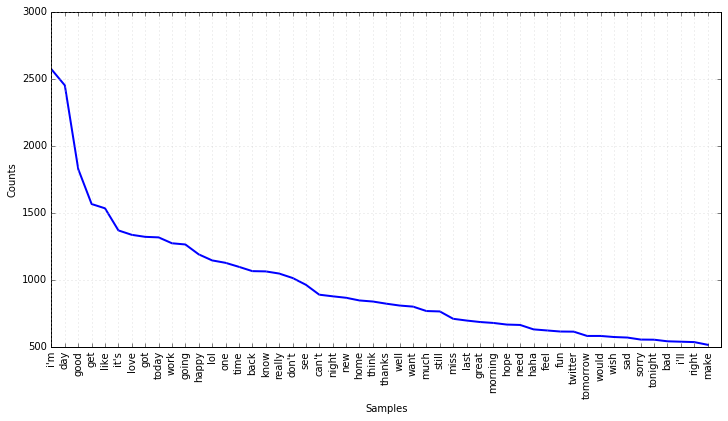

In [6]:
import nltk
import matplotlib.pyplot as plt
fdist = nltk.FreqDist(palabras)
plt.figure(figsize=(12,6))
fdist.plot(50)

### d ) Criterio para un problema binario

In [41]:
# Criterio por ahora, neutral positivo,
# empty y surprise negativo, ( Para dejar medianamente balanceado los datos)

positivas = ['love','relief','fun','enthusiasm','happiness','neutral']
negativas = ['anger','sadness','hate','worry','boredom','empty','surprise']

pos = 0
for key in emotions:
    if key in positivas:
        pos += emotions[key]
print pos 

neg = 0
for key in emotions:
    if key in negativas:
        neg += emotions[key]
print neg

emotions_l = np.concatenate((negativas,positivas),axis=0)
print emotions_l
print len(motions)
#6,-6
emotions = {}
count = -7
for em in range(len(emotions_l)):
    emotions[emotions_l[em]] = str(count+1)
    count += 1
print emotions
    
    



21
-21
['anger' 'sadness' 'hate' 'worry' 'boredom' 'empty' 'surprise' 'love'
 'relief' 'fun' 'enthusiasm' 'happiness' 'neutral']
13
{'love': '1', 'neutral': '6', 'fun': '3', 'sadness': '-5', 'boredom': '-2', 'worry': '-3', 'enthusiasm': '4', 'anger': '-6', 'surprise': '0', 'happiness': '5', 'hate': '-4', 'empty': '-1', 'relief': '2'}


In [68]:
def codificar_emotions(arreglo):
    nuevo_arreglo = []
    for i in range(len(arreglo)):
        nuevo_arreglo.append(emotions[arreglo[i]])
    return nuevo_arreglo

#Arreglos decodificados
y_train_em = codificar_emotions(y_train)
y_test_em =  codificar_emotions(y_test)

In [69]:
def codificar(arreglo):
    for i in range(len(arreglo)):
        if arreglo[i] in positivas:
            arreglo[i] = "1"
        else:
            arreglo[i] = "-1"
    return arreglo
y_train = codificar(y_train)
y_test = codificar(y_test)

### e) Representación de documentos

In [9]:
print X_train[:2]

[ [u'know', u'listenin', u'bad', u'habit', u'earlier', u'started', u'freakin', u'part']
 [u'layin', u'bed', u'headache', u'ughhh', u'waitin', u'call']]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tweets1 = []
X_tweets2 = []
for i in range(len(X_train)):
    X_tweets1.append((" ").join(X_train[i]))
for i in range(len(X_test)):
    X_tweets2.append((" ").join(X_test[i]))
X_train_tfidf = vectorizer.fit_transform(X_tweets1) # Le damos el vocabulario de entrenamiento!
X_test_tfidf = vectorizer.transform(X_tweets2)

Aquí entrenamos con el conjunto de entrenamiento y luego transformamos el conjunto de test en base al diccionario generado.

Ojo, hay que tener un buen diccionario para poder generalizar futuras palabras, si el diccionario generado es pobre, las predicciones serán pobres, es el problema eterno de generar un diccionario suficientemente grande para todas las palabras.

In [11]:

print X_train_tfidf[0]
print "test"
print X_test_tfidf[0]

  (0, 12508)	0.212940316487
  (0, 13151)	0.44619698228
  (0, 2215)	0.245065785502
  (0, 9998)	0.452607374176
  (0, 7194)	0.357270268251
  (0, 21141)	0.331630769011
  (0, 8834)	0.379645664544
  (0, 16463)	0.33000326983
test
  (0, 14477)	0.752979926114
  (0, 13418)	0.658043487066


### f) Entrenar con 5 modelos clasificadores

In [13]:

# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf_bnb = BernoulliNB().fit(X_train_tfidf,y_train)
predicted = clf_bnb.predict(X_test_tfidf)
predicted_train = clf_bnb.predict(X_train_tfidf)
print "Accuracy Bernoulli Naive Bayes train:",(accuracy_score(y_train,predicted_train))   
print "Accuracy Bernoulli Naive Bayes test:",(accuracy_score(y_test,predicted))   

print " "
#Multi Naive Bayes == Bernoulli NB
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB().fit(X_train_tfidf,y_train)
predicted = clf_mnb.predict(X_test_tfidf)
predicted_train = clf_mnb.predict(X_train_tfidf)
print "Accuracy Multinomial Naive Bayes train:",(accuracy_score(y_train,predicted_train))   
print "Accuracy Multinomial Naive Bayes test:",(accuracy_score(y_test,predicted))   

Accuracy Bernoulli Naive Bayes train: 0.819573298348
Accuracy Bernoulli Naive Bayes test: 0.69588080631
 
Accuracy Multinomial Naive Bayes train: 0.821291350389
Accuracy Multinomial Naive Bayes test: 0.68561412295


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_tweets1)
X_test_counts = count_vect.transform(X_tweets2)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()

print X_train_counts[0]

model.fit(X_train_counts.toarray(),y_train) # Memory Error .toarray
predicted = model.predict(X_test_counts)


  (0, 16463)	1
  (0, 8834)	1
  (0, 21141)	1
  (0, 7194)	1
  (0, 9998)	1
  (0, 2215)	1
  (0, 13151)	1
  (0, 12508)	1


MemoryError: 

LDA y QDA explotan con la dimensionalidad por eso no lo ocuparemos

# SVM 

In [24]:
from sklearn.svm import SVC as SVM #SVC is for classification

model= SVM()
model.set_params(kernel='linear')
model.fit(X_train_counts,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
predicted = model.predict(X_test_counts)
predicted_train = model.predict(X_train_counts)

In [27]:
print "Accuracy SVM train:",(accuracy_score(y_train,predicted_train))   
print "Accuracy SVMs test:",(accuracy_score(y_test,predicted)) 

Accuracy SVM train: 0.821291350389
Accuracy SVMs test: 0.683485664204


### g) Classification Report

In [29]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print (classification_report(yt,model.predict(xt)))

In [31]:
score_the_model(clf_bnb,X_train_tfidf,y_train,X_test_tfidf,y_test)
score_the_model(clf_mnb,X_train_tfidf,y_train,X_test_tfidf,y_test)
score_the_model(model,X_train_counts,y_train,X_test_counts,y_test)

Training Accuracy: 0.819573
Test Accuracy: 0.695843
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.70      0.60      0.65      3703
          1       0.69      0.78      0.73      4284

avg / total       0.70      0.70      0.69      7987

Training Accuracy: 0.821291
Test Accuracy: 0.685575
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.70      0.57      0.63      3703
          1       0.68      0.78      0.73      4284

avg / total       0.69      0.69      0.68      7987

Training Accuracy: 0.876363
Test Accuracy: 0.683446
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.68      0.60      0.64      3703
          1       0.69      0.75      0.72      4284

avg / total       0.68      0.68      0.68      7987



###  h) [Opcional]

### i) Multilabel

In [ ]:
Ahora deber´a extender el problema a las m´ultiples clases que tiene presente (las distintas emociones),
es decir, su trabajo ser´a el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las caracter´ısticas generadas mediante las t´ecnicas
en el punto e). Recuerde que tendr´a que codificar las distintas clases como valores num´ericos enteros.

In [71]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf_bnb = BernoulliNB().fit(X_train_tfidf,y_train_em)
predicted = clf_bnb.predict(X_test_tfidf)
predicted_train = clf_bnb.predict(X_train_tfidf)
print "Accuracy Bernoulli Naive Bayes train:",(accuracy_score(y_train_em,predicted_train))   
print "Accuracy Bernoulli Naive Bayes test:",(accuracy_score(y_test_em,predicted))   

print " "
#Multi Naive Bayes == Bernoulli NB
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB().fit(X_train_tfidf,y_train_em)
predicted = clf_mnb.predict(X_test_tfidf)
predicted_train = clf_mnb.predict(X_train_tfidf)
print "Accuracy Multinomial Naive Bayes train:",(accuracy_score(y_train_em,predicted_train))   
print "Accuracy Multinomial Naive Bayes test:",(accuracy_score(y_test_em,predicted))


from sklearn.svm import SVC as SVM #SVC is for classification
model= SVM()
model.set_params(kernel='linear')
model.fit(X_train_counts,y_train_em)

predicted = model.predict(X_test_counts)
predicted_train = model.predict(X_train_counts)

print "Accuracy SVM train:",(accuracy_score(y_train_em,predicted_train))   
print "Accuracy SVMs test:",(accuracy_score(y_test_em,predicted)) 

Accuracy Bernoulli Naive Bayes train: 0.461781151407
Accuracy Bernoulli Naive Bayes test: 0.30925253537
 
Accuracy Multinomial Naive Bayes train: 0.456127198326
Accuracy Multinomial Naive Bayes test: 0.308501314636
Accuracy SVM train: 0.790553837504
Accuracy SVMs test: 0.320020032553


(j) Utilice los clasicadores que son extendidos por defecto a multiples clases para detectar emociones en
cada tweet, muestre sus desempe~nos a traves del error de pruebas en un graco resumen.

k) Utilice clasicadores binarios que pueden ser extendidos a traves de otras tecnicas, tal como One vs
One y One vs All/Rest [14]

l) Para el caso de la Regresion Logstica compare sus dos metodos para ser extendidos a multiples clases.
Uno a traves de One vs Rest y otro deniendo que la variable a predecir se distribuye Multinomial.

m) Compare los resultados entre los clasicadores extendidos por defecto y los binarios que son extendidos
mediante otras tecnicas, construya una tabla o graco resumen. Los clasicadores que mejor se
comportan en el caso binario >Siguen teniendo ese desempe~no en multiples clases?